# Homework 3

Spencer Pease  
ASTR 427

----------------------------

In [1]:
# Imports

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [2]:
# Bisection method

def bisection(a, b):
    """
    """
    c = (a + b)/2
    return c

In [3]:
# Newton-Raphson method

def newton(x0, fx0, dfx0):
    """
    """
    x = x0 - (fx0/dfx0)
    return x

In [4]:
def findBisectionRoot(f, a, b, tol):
    """
    """
    
    c_val = []
    fc_val = []
    
    fc = f(bisection(a, b))
    
    i = 0
    while np.abs(fc) > tol:
        i += 1
        c = bisection(a, b)
        fc = f(c)
    
        c_val.append(c)
        fc_val.append(fc)
    
        if f(a) * fc < 0:
            b = c
        else: # f(b) * fc < 0:
            a = c
    
    return np.array(c_val), np.array(fc_val), i

In [5]:
def findNewtonRoot(f, df, x0, tol):
    """
    """
    
    x_val = [x0]
    fx_val = [f(x0)]

    i = 0
    while np.abs(f(x0)) > tol:
        i += 1
    
        fx0 = fx_val[-1]
        dfx0 = df(x_val[-1])
    
        x_new = newton(x0, fx0, dfx0)
    
        x_val.append(x_new)
        fx_val.append(f(x_new))
    
        x0 = x_val[-1]
    
    return np.array(x_val), np.array(fx_val), i

Simple test case:  
  
$x^{2} = z$

In [6]:
# 1(a) setup

z = 2
def f1(x):
    return x**2 - z

def df1(x):
    """
    """
    return 2*x

tol = 1e-6 # tolerance of when to stop iterations

In [7]:
# 1(a) bisection

c_val, fc_val, itr1 = findBisectionRoot(f1, -1., 3., tol)

In [8]:
# 1(a) newton

x_val, fx_val, itr2 = findNewtonRoot(f1, df1, 1., tol)

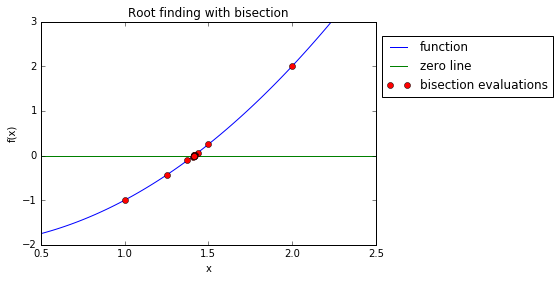

final value: 2.6871771297e-07 @ x = 1.41421365738
iterations: 23




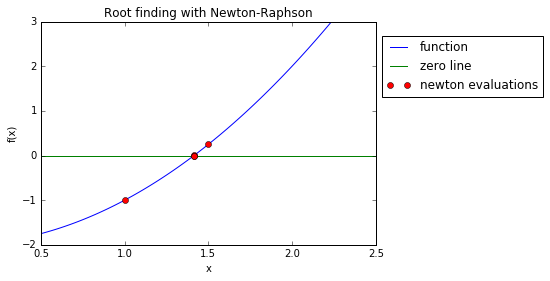

final value: 4.51061410445e-12 @ x = 1.41421356237
iterations: 4


In [9]:
# 1(a) plotting

x = np.linspace(.5, 2.5, 100)

# plot of bisection method
plt.figure(1)
plt.xlim(.5, 2.5)
plt.ylim(-2, 3)
plt.plot(x, f1(x), label='function')
plt.plot(x, [0]*x, label='zero line')
plt.plot(c_val, fc_val, marker='o', linestyle='none', label='bisection evaluations')

# labeling
plt.title('Root finding with bisection')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

print "final value:", fc_val[-1], "@ x =", c_val[-1]
print "iterations:", itr1
print '\n'


# plot of newton method
plt.figure(2)
plt.xlim(.5, 2.5)
plt.ylim(-2, 3)
plt.plot(x, f1(x), label='function')
plt.plot(x, [0]*x, label='zero line')
plt.plot(x_val, fx_val, marker='o', linestyle='none', label='newton evaluations')

# labeling
plt.title('Root finding with Newton-Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

print "final value:", fx_val[-1], "@ x =", x_val[-1]
print "iterations:", itr2

Kepler's equation:  
  
$M = E - e\sin(E)$

In [19]:
# 1(b) setup

def kepler(E, e, M):
    return E - e*np.sin(E) - M

def d_kepler(E, e):
    return 1 - E*e*np.cos(E)

def kepler1(E):
    M = 1.5
    e = .5
    return kepler(E, e, M)

def d_kepler1(E):
    e = .5
    return d_kepler(E, e)

def kepler2(E):
    M = 1.5
    e = .9
    return kepler(E, e, M)

def d_kepler2(E):
    e = .9
    return d_kepler(E, e)

tol = 1e-6

In [17]:
# 1(b) bisection

c2_val, fc2_val, itr3 = findBisectionRoot(kepler1, 1., 3., tol) # M = 1.5, e = .5
c3_val, fc3_val, itr4 = findBisectionRoot(kepler2, 1., 3., tol) # M = 1.5, e = .9

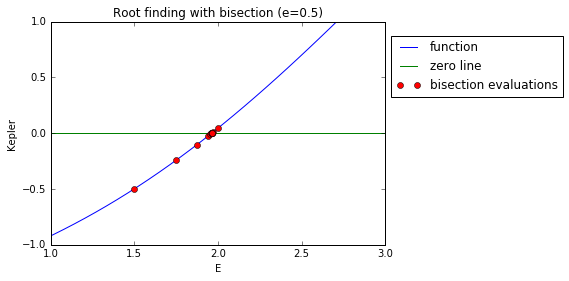

final value: -6.75000176642e-07 @ x = 1.9621887207
iterations: 16




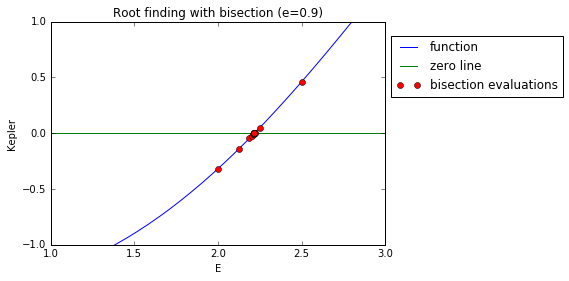

final value: -9.3378521715e-07 @ x = 2.21799659729
iterations: 20


In [18]:
E = np.linspace(0, 2*np.pi, 100)

plt.figure(1)
plt.xlim(1, 3)
plt.ylim(-1, 1)
plt.plot(E, kepler1(E), label='function')
plt.plot(E, [0]*E, label='zero line')
plt.plot(c2_val, fc2_val, marker='o', linestyle='none', label='bisection evaluations')

plt.title('Root finding with bisection (e=0.5)')
plt.xlabel('E')
plt.ylabel('Kepler')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

print "final value:", fc2_val[-1], "@ x =", c2_val[-1]
print "iterations:", itr3
print '\n'


plt.figure(2)
plt.xlim(1, 3)
plt.ylim(-1, 1)
plt.plot(E, kepler2(E), label='function')
plt.plot(E, [0]*E, label='zero line')
plt.plot(c3_val, fc3_val, marker='o', linestyle='none', label='bisection evaluations')

plt.title('Root finding with bisection (e=0.9)')
plt.xlabel('E')
plt.ylabel('Kepler')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

print "final value:", fc3_val[-1], "@ x =", c3_val[-1]
print "iterations:", itr4

In [21]:
# 1(b) newton

x2_val, fx2_val, itr5 = findNewtonRoot(kepler1, d_kepler1, 1., tol)
x3_val, fx3_val, itr6 = findNewtonRoot(kepler2, d_kepler2, 1., tol)

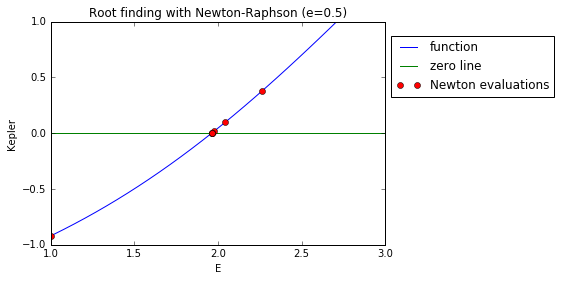

final value: 7.57545825181e-07 @ x = 1.96218992378
iterations: 8




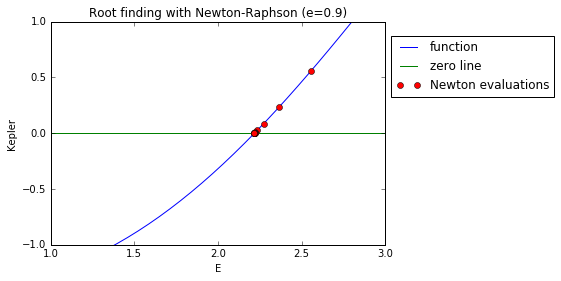

final value: 5.57720357897e-07 @ x = 2.21799756413
iterations: 15


In [22]:
E = np.linspace(0, 2*np.pi, 100)

plt.figure(1)
plt.xlim(1, 3)
plt.ylim(-1, 1)
plt.plot(E, kepler1(E), label='function')
plt.plot(E, [0]*E, label='zero line')
plt.plot(x2_val, fx2_val, marker='o', linestyle='none', label='Newton evaluations')

plt.title('Root finding with Newton-Raphson (e=0.5)')
plt.xlabel('E')
plt.ylabel('Kepler')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

print "final value:", fx2_val[-1], "@ x =", x2_val[-1]
print "iterations:", itr5
print '\n'


plt.figure(2)
plt.xlim(1, 3)
plt.ylim(-1, 1)
plt.plot(E, kepler2(E), label='function')
plt.plot(E, [0]*E, label='zero line')
plt.plot(x3_val, fx3_val, marker='o', linestyle='none', label='Newton evaluations')

plt.title('Root finding with Newton-Raphson (e=0.9)')
plt.xlabel('E')
plt.ylabel('Kepler')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

print "final value:", fx3_val[-1], "@ x =", x3_val[-1]
print "iterations:", itr6

## Problem 2